In [32]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
data = pd.merge(ride, city, how="left", on=["city", "city"])

# Display the data table for preview
data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

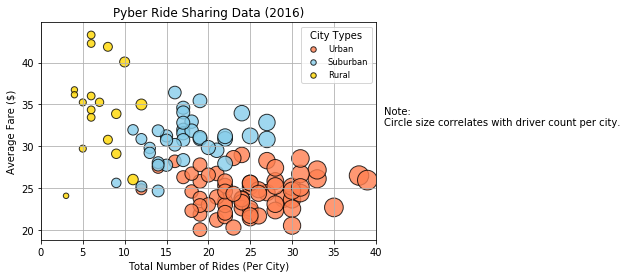

In [18]:
# Obtain the x and y coordinates for each of the three city types
urban = data[data["type"] == "Urban"]
suburban = data[data["type"] == "Suburban"]
rural = data[data["type"] == "Rural"]

urban_count = urban.groupby(["city"]).count()["ride_id"]
urban_fare = urban.groupby(["city"]).mean()["fare"]
urban_drivers = urban.groupby(["city"]).mean()["driver_count"]

sub_count = suburban.groupby(["city"]).count()["ride_id"]
sub_fare = suburban.groupby(["city"]).mean()["fare"]
sub_drivers = suburban.groupby(["city"]).mean()["driver_count"]

rural_count = rural.groupby(["city"]).count()["ride_id"]
rural_fare = rural.groupby(["city"]).mean()["fare"]
rural_drivers = rural.groupby(["city"]).mean()["driver_count"]

# Build the scatter plots for each city types
plt.scatter(urban_count, 
            urban_fare, 
            s=10*urban_count, c="coral", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Urban")
plt.scatter(sub_count, 
            sub_fare, 
            s=10*sub_count, c="skyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Suburban")
plt.scatter(rural_count, 
            rural_fare, 
            s=10*rural_count, c="gold", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.xlim((0,40))

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(41, 32.5, "Note:\nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("bubble.png")

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

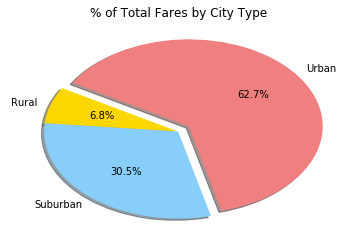

In [28]:
# Calculate Type Percents
type_per = data.groupby(["type"]).sum()["fare"] / data["fare"].sum() * 100

# Build Pie Chart
plt.pie(type_per, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("%_tot_fares.png")

In [22]:
# Show Figure
plt.show()

## Total Rides by City Type

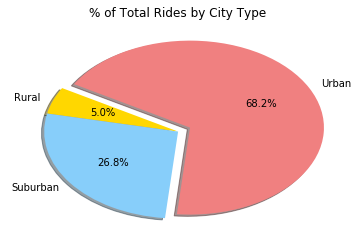

In [29]:
# Calculate Ride Percents
ride_per = data.groupby(["type"]).sum()["ride_id"] / data["ride_id"].sum() * 100

# Build Pie Chart
plt.pie(ride_per, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("%_tot_rides.png")

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

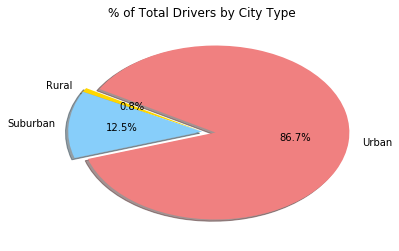

In [34]:
# Calculate Driver Percents
drivers_per = data.groupby(["type"]).sum()["driver_count"] / data["driver_count"].sum() * 100

# Build Pie Charts
plt.pie(drivers_per, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("%_tot_drivers.png")

In [9]:
# Show Figure
plt.show()